In [1]:
from trajectree.fock_optics.utils import *
from trajectree.fock_optics.light_sources import *
from trajectree.fock_optics.devices import *
from trajectree.fock_optics.measurement import *
from trajectree.fock_optics.outputs import *

import time
import json
import numpy as np

/home/asingal/home/.venv/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/asingal/home/.venv/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
# params
trunc = 3
N = trunc+1
error_tolerance = 1e-12

mean_photon_num = (0.5)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
# psi = new_ls(N, mean_photon_num, error_tolerance) 

idler_angles = np.linspace(0, np.pi, 15)
signal_angles = np.linspace(0, 2*np.pi, 40)

Corresponding Basis terms:
0H0V_D 0H0V_C 0H0V_B 0H0V_A - 0 - [0.78636564-0.j]
0H0V_D 0H0V_C 0H1V_B 0H1V_A - 17 - [-0.+0.36403878j]
0H0V_D 0H0V_C 0H2V_B 0H2V_A - 34 - [-0.16381725-0.j]
0H0V_D 0H0V_C 0H3V_B 0H3V_A - 51 - [0.-0.09292146j]
0H0V_D 0H0V_C 1H0V_B 1H0V_A - 68 - [-0.+0.36403878j]
0H0V_D 0H0V_C 1H1V_B 1H1V_A - 85 - [-0.1685275-0.j]
0H0V_D 0H0V_C 1H2V_B 1H2V_A - 102 - [0.-0.07583728j]
0H0V_D 0H0V_C 1H3V_B 1H3V_A - 119 - [0.0430169-0.j]
0H0V_D 0H0V_C 2H0V_B 2H0V_A - 136 - [-0.16381725-0.j]
0H0V_D 0H0V_C 2H1V_B 2H1V_A - 153 - [0.-0.07583728j]
0H0V_D 0H0V_C 2H2V_B 2H2V_A - 170 - [0.03412673+0.j]
0H0V_D 0H0V_C 2H3V_B 2H3V_A - 187 - [-0.+0.01935758j]
0H0V_D 0H0V_C 3H0V_B 3H0V_A - 204 - [0.-0.09292146j]
0H0V_D 0H0V_C 3H1V_B 3H1V_A - 221 - [0.0430169-0.j]
0H0V_D 0H0V_C 3H2V_B 3H2V_A - 238 - [-0.+0.01935758j]
0H0V_D 0H0V_C 3H3V_B 3H3V_A - 255 - [-0.01098013-0.j]


/home/asingal/home/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/asingal/home/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


5.136155605316162


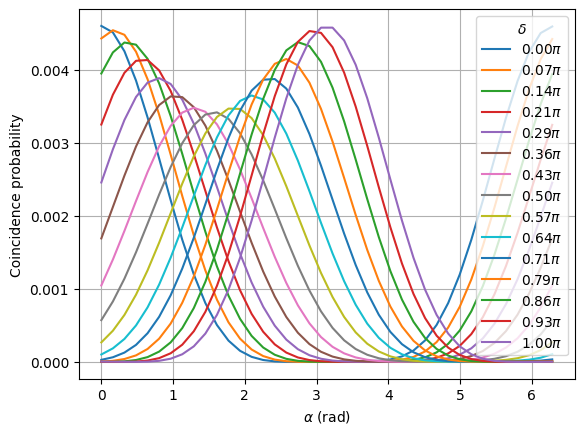

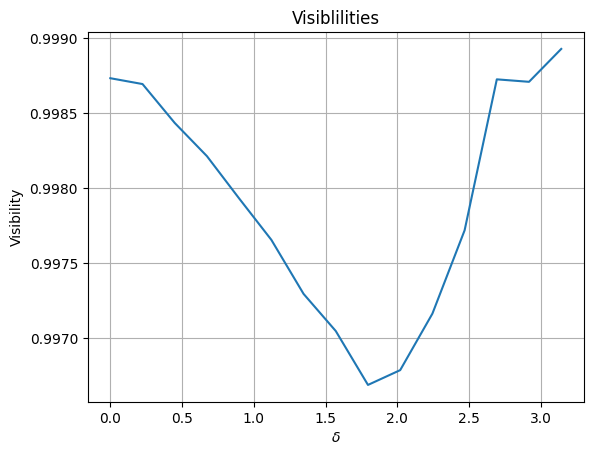

In [3]:
start = time.time()

read_quantum_state(psi, N)

coincidence_PNR = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, rotations = {"signal":(0,1), "idler":(2,3)}, measurements = {1:(0,2), 0:(1,3)}, pnr = True, det_outcome = 3, compress=True, contract=True, draw = False)

fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles)

print(time.time()-start)